*Hints on Solving Asg1's Q10*

In [1]:
from jove.DotBashers import *
from jove.Def_md2mc import *
from jove.Def_DFA   import *
from jove.LangDef   import *

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)



*Problem-1*

Design a DFA with alphabet {0,1} such that

* it accepts all even length strings

Generating LALR tables


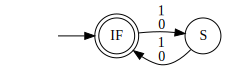

In [2]:
# Accept even-length strings over {0,1}

DEven = md2mc('''
DFA !! IMPORTANT: this is required to tell the markdown converter 
    !! the expected machine type

IF: 0|1 -> S
S : 0|1 -> IF
''')

#..use the right dotObj command of the DFA with the right FuseEdges boolean value..
dotObj_dfa(DEven, FuseEdges=True)

In [3]:
DEven

{'Delta': {('IF', '0'): 'S',
  ('IF', '1'): 'S',
  ('S', '0'): 'IF',
  ('S', '1'): 'IF'},
 'F': {'IF'},
 'Q': {'IF', 'S'},
 'Sigma': {'0', '1'},
 'q0': 'IF'}

*Show it accepts only the requested strings*

In [4]:
help(accepts_dfa)

Help on function accepts_dfa in module jove.Def_DFA:

accepts_dfa(D, s)
    In : D (consistent DFA)
         s (string over D's sigma, including "")
    Out: Boolean (if state after s-run is in D's final).



In [5]:
TestStrs = lstar({'0','1'}, 6)

In [6]:
TestStrs

{'',
 '0',
 '00',
 '000',
 '0000',
 '00000',
 '000000',
 '000001',
 '00001',
 '000010',
 '000011',
 '0001',
 '00010',
 '000100',
 '000101',
 '00011',
 '000110',
 '000111',
 '001',
 '0010',
 '00100',
 '001000',
 '001001',
 '00101',
 '001010',
 '001011',
 '0011',
 '00110',
 '001100',
 '001101',
 '00111',
 '001110',
 '001111',
 '01',
 '010',
 '0100',
 '01000',
 '010000',
 '010001',
 '01001',
 '010010',
 '010011',
 '0101',
 '01010',
 '010100',
 '010101',
 '01011',
 '010110',
 '010111',
 '011',
 '0110',
 '01100',
 '011000',
 '011001',
 '01101',
 '011010',
 '011011',
 '0111',
 '01110',
 '011100',
 '011101',
 '01111',
 '011110',
 '011111',
 '1',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100001',
 '10001',
 '100010',
 '100011',
 '1001',
 '10010',
 '100100',
 '100101',
 '10011',
 '100110',
 '100111',
 '101',
 '1010',
 '10100',
 '101000',
 '101001',
 '10101',
 '101010',
 '101011',
 '1011',
 '10110',
 '101100',
 '101101',
 '10111',
 '101110',
 '101111',
 '11',
 '110',
 '1100',
 '11000',
 '11

In [7]:
# Test the DFA

# ..Write some Python code that prints the strings the DFA accepts..
# ..End this printout with a statement saying "All other strings are rejected"..

for w in TestStrs:
    if accepts_dfa(DEven, w):
        print(w, " is accepted")
print("All other strings rejected")

  is accepted
000110  is accepted
0001  is accepted
100111  is accepted
0100  is accepted
101100  is accepted
101011  is accepted
011010  is accepted
111111  is accepted
000111  is accepted
010110  is accepted
100000  is accepted
010000  is accepted
111110  is accepted
100010  is accepted
0101  is accepted
000001  is accepted
1100  is accepted
100110  is accepted
011101  is accepted
00  is accepted
110100  is accepted
0011  is accepted
001111  is accepted
011011  is accepted
11  is accepted
1010  is accepted
110110  is accepted
111000  is accepted
011110  is accepted
111101  is accepted
100101  is accepted
110011  is accepted
110111  is accepted
0010  is accepted
001000  is accepted
010010  is accepted
100001  is accepted
101101  is accepted
0111  is accepted
100011  is accepted
101110  is accepted
110101  is accepted
011111  is accepted
111001  is accepted
110001  is accepted
1111  is accepted
001110  is accepted
10  is accepted
011000  is accepted
011001  is accepted
100100  is accep

*Let us do another exercise*


Design a DFA with alphabet {0,1} such that

* it accepts all odd-length strings which begin with a 1
* it rejects all other strings

*Solution outline*:

Describe your solution in a few sentences. This helps you form your design
strategy. Then you can incrementally code-up and test the machine.

* I will call my machine D1Odd to signify that it is a DFA for strings that are odd in length when starting with a 1.
* All other cases are separately handled:
 - starting with a 0 
    * reject
 - starting with a 1, but even length
    * reject

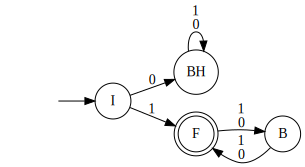

In [8]:
# Odd len when starting with 1
# Reject all others

D1Odd = md2mc('''
DFA !! IMPORTANT: this is required to tell the markdown converter 
    !! the expected machine type

I : 1   -> F
F : 0|1 -> B
B : 0|1 -> F
I : 0   -> BH
BH: 0|1 -> BH
''')

#..use the right dotObj command of the DFA with the right FuseEdges boolean value..
dotObj_dfa_w_bh(D1Odd, FuseEdges=True)

In [9]:
# Test the DFA

# ..Write some Python code that prints the strings the DFA accepts..
# ..End this printout with a statement saying "All other strings are rejected"..

for w in TestStrs:
    if accepts_dfa(D1Odd, w):
        print(w, " is accepted")
print("All other strings rejected")

100  is accepted
10100  is accepted
111  is accepted
110  is accepted
11001  is accepted
10101  is accepted
10010  is accepted
101  is accepted
11110  is accepted
11010  is accepted
10110  is accepted
11111  is accepted
10111  is accepted
11101  is accepted
1  is accepted
11100  is accepted
10000  is accepted
11011  is accepted
11000  is accepted
10011  is accepted
10001  is accepted
All other strings rejected
